# Data Collection and Encoding
### This notebook shows examples of how to use the data collection and encoding functions of the 'NDAC' package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import ndac

## Raw data import
The basic raw data should be a colum of a measured experimental values to be used as a metric for classifciation (eg. expression or solubility) and a sequence (eg. amino acid or nucleotide).  The data will be imported as a pandas dataframe so more than the minimum 2 colums is acceptable.

In the example below, there are 6 columns.  The 'conc_cf' (protein experssion level) will be used as the metric and 'nt_seq' will serve as the sequence. 

In [3]:
data = pd.read_csv('dataframes/DF_prest.csv', index_col=0)
data.head()

,prest_id,uniprot_id,conc_cf,aa_seq,nt_seq,aa_len
0,140095,G3V3N0,4.3075,IMTAPSSFEQFKVAMNYLQLYNVPDCLEDIQDADCSSSKCSSSASS...,GACAAGCTTGCGGCCGCAATTATGACAGCTCCCTCCAGTTTTGAGC...,139
1,140099,G3V537,2.9154,TYYAWKHELLGSGTCPALPPREVLGMEELEKLPEEQVAEEELECSA...,GACAAGCTTGCGGCCGCAACCTACTATGCCTGGAAGCATGAGCTGC...,144
2,140225,P12724,1.4877,SLHARPPQFTRAQWFAIQHISLNPPRCTIAMRAINNYRWRCKNQNT...,GACAAGCTTGCGGCCGCATCACTCCATGCCAGACCCCCACAGTTTA...,136
3,140235,H0YH02,6.7224,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,GACAAGCTTGCGGCCGCAGCGAGAGCATTAAATGAAAGCAAAAGAG...,123
4,140309,F5GYC5,3.3848,HRKEPGARLEATRGAARPHKQGTKPMITRPSVSQLGEGKCPSSQHL...,GACAAGCTTGCGGCCGCACATCGGAAAGAGCCTGGGGCAAGGCTGG...,124


## Data classification
Data that are labeled with an emperimental value as a metric are classified.  There are multiple approaches to this classification possible including calssification of the highest and lowest values based on the first and forth quantiles and ???other method(s) here?????

### `quantile_classify`
Classify low values as 0, remove middle values, and classify high values as 1.  The default is to calssify the lowest 25% of values as 0, remove the middle 50% and label the to 25% as 1.

45206 samples input.
11303 samples above high cut, 11302 samples below low cut, 22601 samples removed.


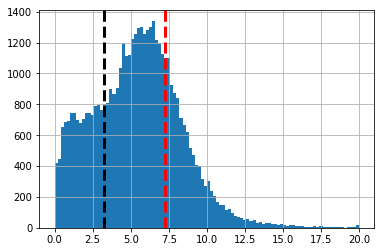

In [4]:
dataframe, hist = ndac.quantile_classify(data['conc_cf'], data['nt_seq'])

You can also specify to split the data differntly as shown in the example below.

45206 samples input.
2271 samples above high cut, 4539 samples below low cut, 38396 samples removed.


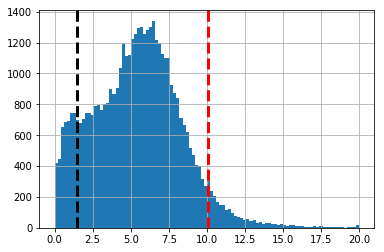

In [7]:
dataframe, hist = ndac.quantile_classify(data['conc_cf'], data['nt_seq'], high_cut=0.95, low_cut=0.1)